# 构建信用卡反欺诈预测模型

## 本项目需解决的问题

本项目通过利用信用卡的历史交易数据，进行机器学习，构建信用卡反欺诈预测模型，提前发现客户**信用卡被盗刷**的事件。

## 建模思路

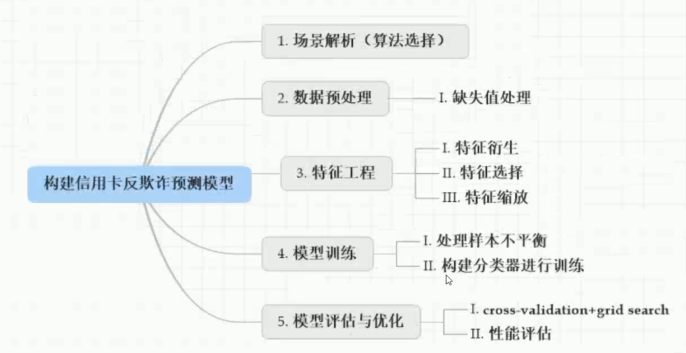

## 项目背景

数据集包含由欧洲持卡人于2013年9月使用信用卡进行交的数据。此数据集显示两天内发生的交易，其中284,807笔交易中有492笔被盗刷。数据集非常不平衡，
积极的类（被盗刷）占所有交易的0.172％。

它只包含作为PCA转换结果的数字输入变量。不幸的是，由于保密问题，我们无法提供有关数据的原始功能和更多背景信息。特征V1，V2，... V28是使用PCA
获得的主要组件，没有用PCA转换的唯一特征是“时间”和“量”。特征'时间'包含数据集中每个事务和第一个事务之间经过的秒数。特征“金额”是交易金额，此特
征可用于实例依赖的成本认知学习。特征'类'是响应变量，如果发生被盗刷，则取值1，否则为0。
以上取自Kaggle官网对本数据集部分介绍（谷歌翻译），关于数据集更多介绍请参考《[Credit Card Fraud Detection](https://link.zhihu.com/?target=https%3A//www.kaggle.com/dalpozz/creditcardfraud)》。

## 场景解析（算法选择）

1. 首先，我们拿到的数据是持卡人两天内的信用卡交易数据，这份数据包含很多维度，要解决的问题是预测持卡人是否会发生信用卡被盗刷。信用卡持卡人是否会发生被盗刷只有两种可能，发生被盗刷或不发生被盗刷。又因为这份数据是打标好的（字段Class是目标列），也就是说它是一个监督学习的场景。于是，我们判定信用卡持卡人是否会发生被盗刷是一个**二元分类**问题，意味着可以通过二分类相关的算法来找到具体的解决办法，本项目选用的算法是逻辑斯蒂回归（Logistic Regression）。
2. 分析数据：数据是结构化数据 ，不需要做特征抽象。特征V1至V28是经过PCA处理，而特征Time和Amount的数据规格与其他特征差别较大，需要对其做特征缩放，将特征缩放至同一个规格。在数据质量方面 ，没有出现乱码或空字符的数据，可以确定字段Class为目标列，其他列为特征列。
3. 这份数据是全部打标好的数据，可以通过交叉验证的方法对训练集生成的模型进行评估。70%的数据进行训练，30%的数据进行预测和评估。
&emsp&emsp**现对该业务场景进行总结如下：**
1. 根据历史记录数据学习并对信用卡持卡人是否会发生被盗刷进行预测，二分类监督学习场景，选择逻辑斯蒂回归（Logistic Regression）算法。
1. 数据为结构化数据，不需要做特征抽象，但需要做特征缩放。

# 1数据获取与解析

In [1]:
import numpy as np

import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

从上面可以看出，数据为结构化数据，不需要抽特征转化，但特征Time和Amount的数据规格和其他特征不一样，需要对其做特征做特征缩放。

In [2]:
credit = pd.read_csv('./creditcard.csv')
credit.shape

(284807, 31)

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


表明此数据有28万行，31列

In [4]:
#查看数据有没有缺失
credit.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

说明数据类型只有float64和int64，且无缺失值，方便后续处理

In [5]:
credit.info()  #该方法也能判定是否有缺失值，查看详细信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# 2特征工程

In [6]:
c_counts = credit['Class'].value_counts()
c_counts   # 可以看出标签数据极度不平衡

0    284315
1       492
Name: Class, dtype: int64

In [7]:
type(c_counts)  # c_counts为series类型,既然是Series类型，那就可以直接使用Series画图

pandas.core.series.Series

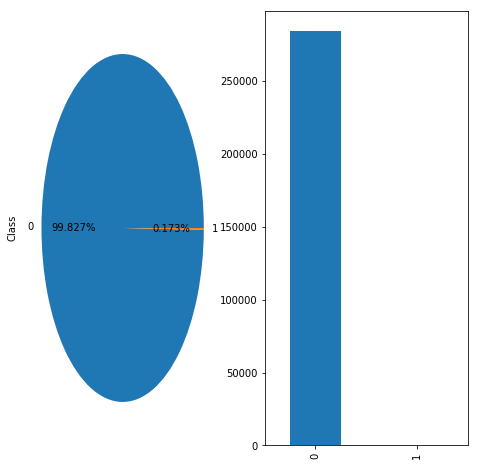

In [8]:
plt.figure(figsize=(8,8))  # 第一个表示宽度为8，第二个表示高度为8
# 可以绘制饼图
ax = plt.subplot(1,2,1)  # 1行2列，饼图位于第一列
c_counts.plot(kind = 'pie',autopct = '%0.3f%%',ax = ax)   # autopct表示auto percent，保留3位有效数字

# 也可以绘制柱状图
ax = plt.subplot(1,2,2)  # 1行2列，柱状图位于第二列
c_counts.plot(kind = 'bar',ax = ax)

通过上面的图和数据可知，存在492例盗刷，占总样本的0.17%，由此可知，这是一个明显的数据类别不平衡问题，稍后我们采用过采样(增加数据)的方法对这种问题进行处理。

## 特征转换,将时间从单位每秒化为单位每小时

In [9]:
7200%3600  # 模运算

0

In [10]:
divmod(7201,3600)  # 商为2，余数为1

(2, 1)

In [11]:
divmod(7201,3600)[0]

2

In [12]:
# map或者apply方法都可以（将单位每秒转化为单位每小时）
credit['Time'] = credit['Time'].apply(lambda x: divmod(x, 3600)[0])
#credit['Time'] = credit['Time'].map(lambda x:divmod(x,3600)[0])

In [13]:
credit['Time']  # 两天的数据，0-47，一共48个小时

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
          ... 
284777    47.0
284778    47.0
284779    47.0
284780    47.0
284781    47.0
284782    47.0
284783    47.0
284784    47.0
284785    47.0
284786    47.0
284787    47.0
284788    47.0
284789    47.0
284790    47.0
284791    47.0
284792    47.0
284793    47.0
284794    47.0
284795    47.0
284796    47.0
284797    47.0
284798    47.0
284799    47.0
284800    47.0
284801    47.0
284802    47.0
284803    47.0
284804    47.0
284805    47.0
284806    47.0
Name: Time, Length: 284807, dtype: float64

## 特征选择（这里非常重要！！！）

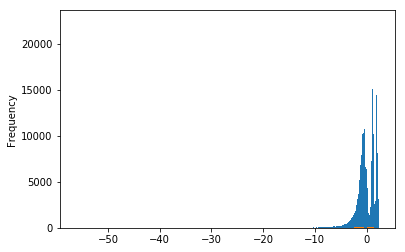

In [14]:
# ! ! ! 所有特征为：V1~V28，看看这28个特征中，有哪些特征可以删除掉

# 28万多条数据
cond0 = credit['Class'] == 0  # 条件0：没有盗刷的

# 492
cond1 = credit['Class'] == 1   # 条件1：被盗刷的 

# hist 直方图相当于就是柱状图
credit['V1'][cond0].plot(kind = 'hist',bins = 500)  # 因为cond0的数据有28万多，所以bins设置多一点
credit['V1'][cond1].plot(kind = 'hist',bins = 50)
# 从下面的图中可以看出，两个图看的不是很明显，我们可以分别对其进行归一化处理。就更加清晰（看纵坐标的变化）

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


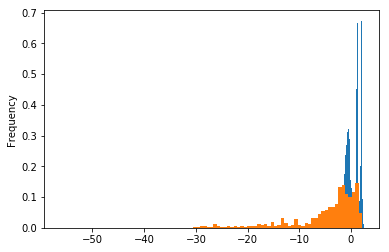

In [15]:
# chj-2019-4-2
# hist 直方图相当于就是柱状图，分别作了归一化处理。黄色的类别0，蓝色的代表类别1
# 数据重合的越多，索命数据越难分离，就不能进行很好的划分.只有分得越开，就越能对0和1进行划分
credit['V1'][cond0].plot(kind = 'hist',bins = 500, normed = True)  # normed表示进行归一化处理
credit['V1'][cond1].plot(kind = 'hist',bins = 50, normed = True)

In [16]:
credit.columns  # 显示所有的特征，方便V1-V28取出

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


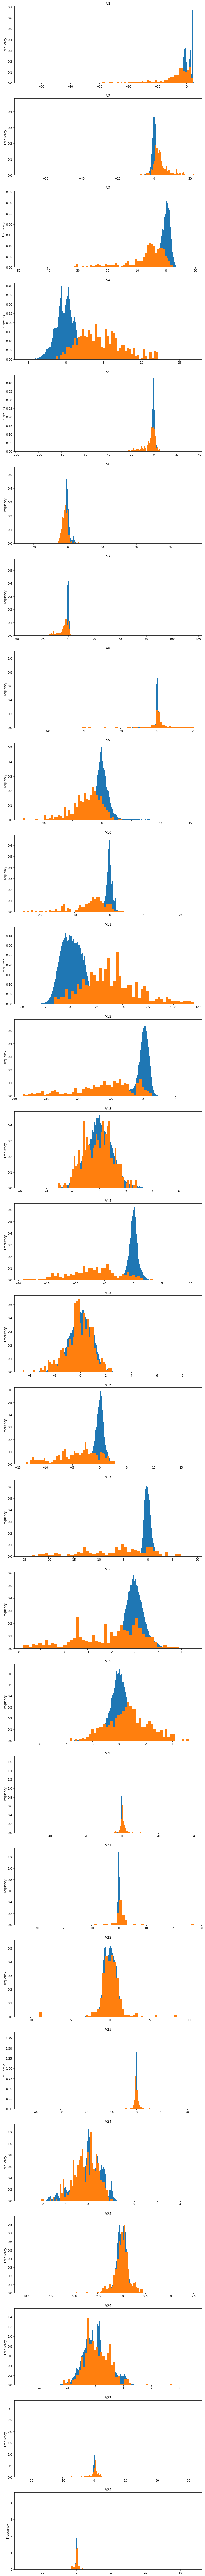

In [17]:
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

cond_0 = credit['Class'] == 0
cond_1 = credit['Class'] == 1
# 在进行for循环之前，先设置图片的尺寸
plt.figure(figsize=(12,28*6))  # 宽度为12，高度为6，28*6表示共有28个高度为6的图片


for i,col in enumerate(cols):  # 获得索引和每列特征名称
    ax = plt.subplot(28,1,i+1)  # 生成28行1列的子图（每一个特征对应于一个子图）
  
    
    credit[col][cond_0].plot(kind = 'hist',bins = 500,normed = True,ax = ax)  # 注意ax的用法
    credit[col][cond_1].plot(kind = 'hist',bins = 50,normed = True,ax = ax)
    
    ax.set_title(col)  # 用特征（列名）对title进行标题命名

In [18]:
# 由于区别越大越容易区分，所以根据上面的图形，可以得出：'V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'需要删除，其他特征保留
drops = ['V13','V15','V20','V22','V23','V24','V25','V26','V27','V28']

credit2 = credit.drop(labels=drops,axis = 1)   # axis=1表示指定删除label=drops的列

上图是不同变量在信用卡被盗刷和信用卡正常的不同分布情况，我们将选择在不同信用卡状态下的分布有明显区别的变量。因此剔除变量V8、V13 、V15 、V20
、V21 、V22、 V23 、V24 、V25 、V26 、V27 和V28变量。

In [19]:
credit.shape  # 原始未删除时的数据大小

(284807, 31)

In [20]:
credit2.shape  # 删除变量后剩余的数据大小

(284807, 21)

## 特征缩放

Amount变量和Time变量的取值范围与其他变量相差较大，所以要对其进行特征缩放  
sklearn.preprocessing.StandarScaler

In [21]:
from sklearn.preprocessing import StandardScaler   # 原理是根据平均值和方差进行缩放

In [22]:
credit2['Amount'].max()  #"Amount"的最大值为2万多

25691.16

In [23]:
credit2['Amount'].min()  # 最小值为0，范围很大，需要进行特征缩放

0.0

In [24]:
credit2['V8'].max()  # 而V8最大值和最小值之间差别很小

20.0072083651213

In [25]:
credit2['V8'].min()

-73.21671845526741

In [26]:
standScaler = StandardScaler()

cols = ['Time','Amount']  # 对这两列特征进行缩放

credit2[cols] = standScaler.fit_transform(credit2[cols])  # fit_transform表示先进行训练，在进行转换

In [27]:
credit2['Amount'].max()  # 看下进行过缩放后的变化

102.36224270928423

In [28]:
credit2['Amount'].min()

-0.35322939296682354

In [29]:
credit2['Time'].min()

-1.9602638886856412

In [30]:
credit2['Time'].max()

1.6044448928637376

## 对特征的重要性进行排序，以进一步减少变量  
### 利用GBDT梯度提升决策树进行特征重要性排序

这里其实也可以用Random Forest进行特征重要性筛选

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
clf = GradientBoostingClassifier()

# 训练数据需要我们给定一下
X_train = credit2.iloc[:,:-1]  # 所有的credit2数据
y_train = credit2['Class']

clf.fit(X_train,y_train)  #拟合

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [33]:
X_train.shape  # 有20个特征

(284807, 20)

In [34]:
feature_importances_ = clf.feature_importances_
feature_importances_    #会将特征的重要性进行排序

array([1.67718379e-03, 0.00000000e+00, 2.35745683e-02, 3.16769136e-02,
       0.00000000e+00, 0.00000000e+00, 2.56771211e-03, 0.00000000e+00,
       0.00000000e+00, 8.99415857e-02, 1.02625129e-02, 0.00000000e+00,
       2.22548874e-02, 7.12323687e-02, 1.98704364e-03, 2.73566129e-02,
       7.17308601e-01, 0.00000000e+00, 1.60010122e-04, 0.00000000e+00])

In [35]:
cols = X_train.columns  # 对应的20个特征
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount'],
      dtype='object')

In [36]:
# 我们需要的特征是从大到小进行排列,而默认的是从小到大排序，需要用[::-1]做出修改
# feature_importances_.argsort() # 这个默认返回的是从小到大的排列
index = feature_importances_.argsort()[::-1]  # 反过来就是从大到小排列
index

array([16,  9, 13,  3, 15,  2, 12, 10,  6, 14,  0, 18,  8,  7,  5,  4, 11,
       17,  1, 19], dtype=int64)

In [37]:
len(index)

20

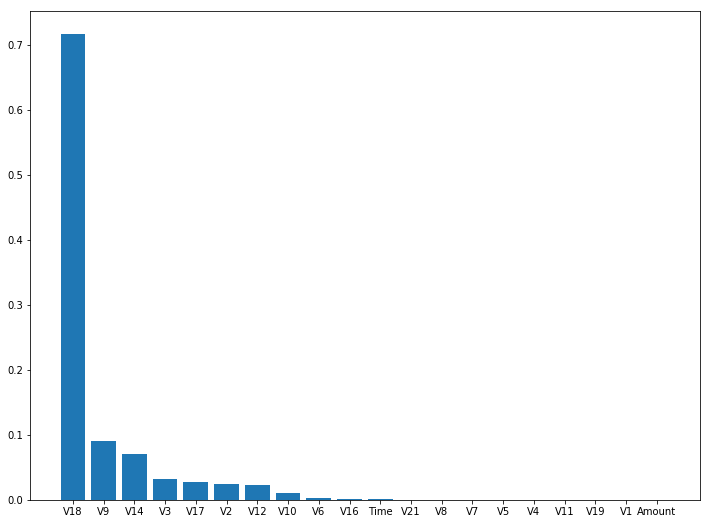

In [38]:
plt.figure(figsize=(12,9))  # 可以调整图片的宽度12和高度9，也可以不调整，自己视情况而定
plt.bar(np.arange(len(index)),feature_importances_[index])  # 绘制图形

_ = plt.xticks(np.arange(len(index)),cols[index])  # 绘制横坐标的标签 这里_表示一堆的matplotlib的打印输出的地址，如果不加_运行结果会很难看

In [39]:
# 根据特征重要性，进一步对无用的特征进行删除
drops = ['V7','V21','V8','V5','V4','V11','V19','V1','Amount']

credit3 = credit2.drop(labels=drops,axis = 1)
credit3.shape  # 只剩下11个特征和一列标签值

(284807, 12)

# 模型训练
**处理样本不平衡问题**

目标变量“Class”正常和被盗刷两种类别的数量差别较大，会对模型学习造成困扰。举例来说，假如有100个样本，其中只有1个是被盗刷样本，其余99个全为正常样本，那么学习器只要制定一个简单的方法：即判别所有样本均为正常样本，就能轻松达到99%的准确率。而这个分类器的决策对我们的风险控制毫无意义。因此，在将数据代入模型训练之前，我们必须先解决样本不平衡的问题。
**现对该业务场景进行总结如下：**
1. 过采样（oversampling），增加正样本使得正、负样本数目接近，然后再进行学习。
2. 欠采样（undersampling），去除一些负样本使得正、负样本数目接近，然后再进行学习。
本次处理样本不平衡采用的方法是**过采样**，具体操作使用SMOTE（Synthetic Minority Oversampling Technique），SMOET的基本原理是：采样最邻近算法，计算出每个少数类样本的K个近邻，从K个近邻中随机挑选N个样本进行随机线性插值，构造新的少数样本，同时将新样本与原数据合成，产生新的训练集。更详细说明参考CMU关于SMOTE: [Synthetic Minority Over-sampling Technique](http://link.zhihu.com/?target=http%3A//www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html)的介绍。

# SMOTE过采样

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = credit3.iloc[:,:-1]

y = credit3['Class']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [43]:
# X_train,y_train 作为训练数据

# 训练时候，要保证样本均衡，将X_train和y_train样本
# 测试时候，样本是否均衡，没有关系

In [44]:
y_train.value_counts()  # 可以看到y_train样本不均衡，因此需要让X_train和y_train均衡一下

0    199027
1       337
Name: Class, dtype: int64

In [45]:
smote = SMOTE()

# ndarray
X_train_new,y_train_new = smote.fit_sample(X_train,y_train)

In [46]:
type(X_train_new)

numpy.ndarray

In [47]:
type(y_train_new)  # 由于是ndarry类别了，因此不能直接用Series形式做图

numpy.ndarray

In [48]:
y_train_new

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [49]:
y_train_new.shape   # 过采样后，样本量增加了

(398054,)

In [50]:
y_train_new

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [51]:
Series(y_train_new).value_counts()   # 经过SMOTE过采样后，类别0和类别1的样本均衡了。

1    199027
0    199027
dtype: int64

经过SMOTE过采样后，样本均衡了，接下来定义一个可视化的函数

# 自定义可视化函数

In [53]:
# for 循环
import itertools   # 运行可视化函数之前要引入itertools

In [54]:
# 画图方法
# 绘制真实值和预测值对比情况   cm为交叉矩阵cross matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()  # 即下图右边的柱形bar
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")#若对应格子上面的数量不超过阈值则，上面的字体为白色，为了方便查看

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 单独的逻辑回归求得查全率Recall rate  
# Recall也叫召回率


In [55]:
from sklearn.linear_model import LogisticRegression  # 引入逻辑斯蒂回归

In [56]:
logistic = LogisticRegression()

# 使用样本均衡的数据进行训练
logistic.fit(X_train_new,y_train_new)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
# 进行预测，此时X_test样本是否均衡并没有关系
y_ = logistic.predict(X_test)

In [58]:
# 生成交叉表
pd.crosstab(y_test,y_)

col_0,0,1
Class,,
0,83423,1865
1,13,142


In [59]:
# 或者也可以直接从sklearn中导入混淆矩阵方法
from sklearn.metrics import confusion_matrix

In [60]:
# 混合矩阵
cm = confusion_matrix(y_test,y_)
cm  # 可以看到得到的结果和的上面的结果是一样的

array([[83423,  1865],
       [   13,   142]], dtype=int64)

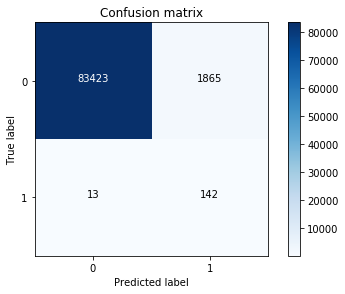

In [61]:
plot_confusion_matrix(cm,[0,1])

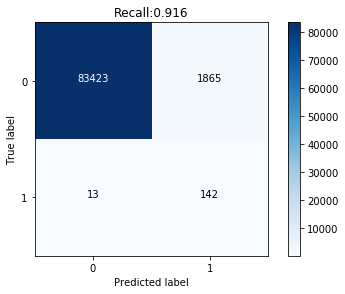

In [62]:
# Recall------“正确被检索的正样本item(TP)"占所有"应该检索到的item(TP+FN)"的比例

plot_confusion_matrix(cm,[0,1],title='Recall:%0.3f'%(cm[1,1]/(cm[1,0] + cm[1,1])))

# 利用GridSearchCV进行交叉验证和模型参数自动调优

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
logistic = LogisticRegression()
# param_grid={'tol':[1e-3,1e-4,1e-5],
#             'C':[1,0.1,10,100]}
# tol为退出条件，C为惩罚系数 
# iid默认是True,此时loss minimized is the total loss per sample,如果是选False，则表示is the mean loss across the folds（交叉验证的时候loss会取平均值）
clf = GridSearchCV(logistic,param_grid={'tol':[1e-3,1e-4,1e-5],'C':[1,0.1,10,100]},cv = 10,iid = False,n_jobs=-1)

clf.fit(X_train_new,y_train_new)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'tol': [0.001, 0.0001, 1e-05], 'C': [1, 0.1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
clf.best_score_

0.9257613457779525

In [66]:
clf.best_score_

0.9257613457779525

In [67]:
clf.best_params_

{'C': 1, 'tol': 0.001}

# 预测

In [70]:
clf.best_estimator_   # 通过GridSearchCV搜索到的最好的模型

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.001, verbose=0, warm_start=False)

In [68]:
y3_ = clf.best_estimator_.predict(X_test)  # 使用该模型进行预测

In [69]:
confusion_matrix(y_test,y3_)

array([[83426,  1862],
       [   14,   141]], dtype=int64)

In [71]:
y2_ = clf.predict(X_test)

In [72]:
confusion_matrix(y_test,y2_)

array([[83426,  1862],
       [   14,   141]], dtype=int64)

In [73]:
y4_ = clf.predict(X_test)

cm2 = confusion_matrix(y_test,y4_)

In [74]:
cm2

array([[83426,  1862],
       [   14,   141]], dtype=int64)

# 结果可视化  
## 对比逻辑斯蒂回归和GridSearchCV结果

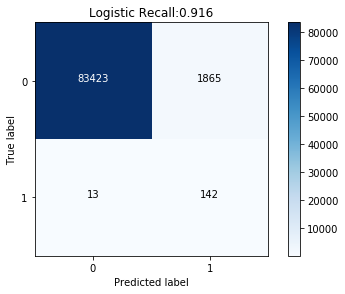

In [75]:
plot_confusion_matrix(cm,[0,1],title='Logistic Recall:%0.3f'%(cm[1,1]/(cm[1,0] + cm[1,1])))



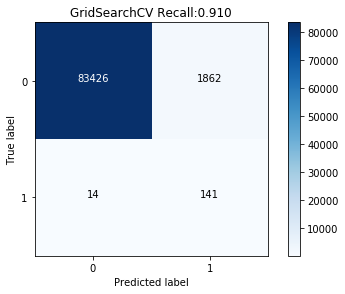

In [76]:
plot_confusion_matrix(cm2,[0,1],title='GridSearchCV Recall:%0.3f'%(cm2[1,1]/(cm2[1,0] + cm2[1,1])))

可以看到稍微有些变化

# 模型评估

解决不同的问题，通常需要不同的指标来度量模型的性能。例如我们希望用算法来预测癌症是否是恶性的，假设100个病人中有5个病人的癌症是恶性，
对于医生来说，尽可能提高模型的**查全率（recall）比提高查准率（precision）**更为重要，因为站在病人的角度，**发生漏发现癌症为恶性比发生误
判为癌症是恶性更为严重。**

由此可见就上面的两个算法而言，明显lgb过拟合了，考虑到样本不均衡问题，故应该选用简单一点的算法（逻辑回归）来减少陷入过拟合的陷阱。

## 考虑设置阈值，来调整预测被盗刷的概率，依次来调整模型的查全率（Recall）

In [77]:
# 概率
y_proba_ = clf.predict_proba(X_test)
y_proba_  #之前clf.predict()预测返回的是0和1，而这里clf.predict_proba()预测返回的是概率（第一个是预测为0的概率，第二个是预测为1的概率）

array([[0.27980945, 0.72019055],
       [0.94325381, 0.05674619],
       [0.95434646, 0.04565354],
       ...,
       [0.70792598, 0.29207402],
       [0.92869458, 0.07130542],
       [0.94879608, 0.05120392]])

In [79]:
from sklearn.metrics import auc,roc_curve

In [80]:
thresholds = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   # 设置阈值

recalls = []

precissions = []

aucs = []

cms = []
for threshold in thresholds:
    y_ = y_proba_[:,1] >= threshold   # 第二列满足大于阈值的True，否则为False
    
    cm = confusion_matrix(y_test,y_)   # 因为阈值设置了10种情况，因此confusion_matrix(y_test,y_)结果会得到对应的10个混淆矩阵
    
    recalls.append(cm[1,1]/(cm[1,0] + cm[1,1]))
    
    precissions.append((cm[0,0] + cm[1,1])/cm.sum())
    
    fpr,tpr,_ = roc_curve(y_test,y_)  # 下划线_表示阈值，这里并不需要用到
    
    auc_ = auc(fpr,tpr)
    
    aucs.append(auc_)
    
    cms.append(cm)

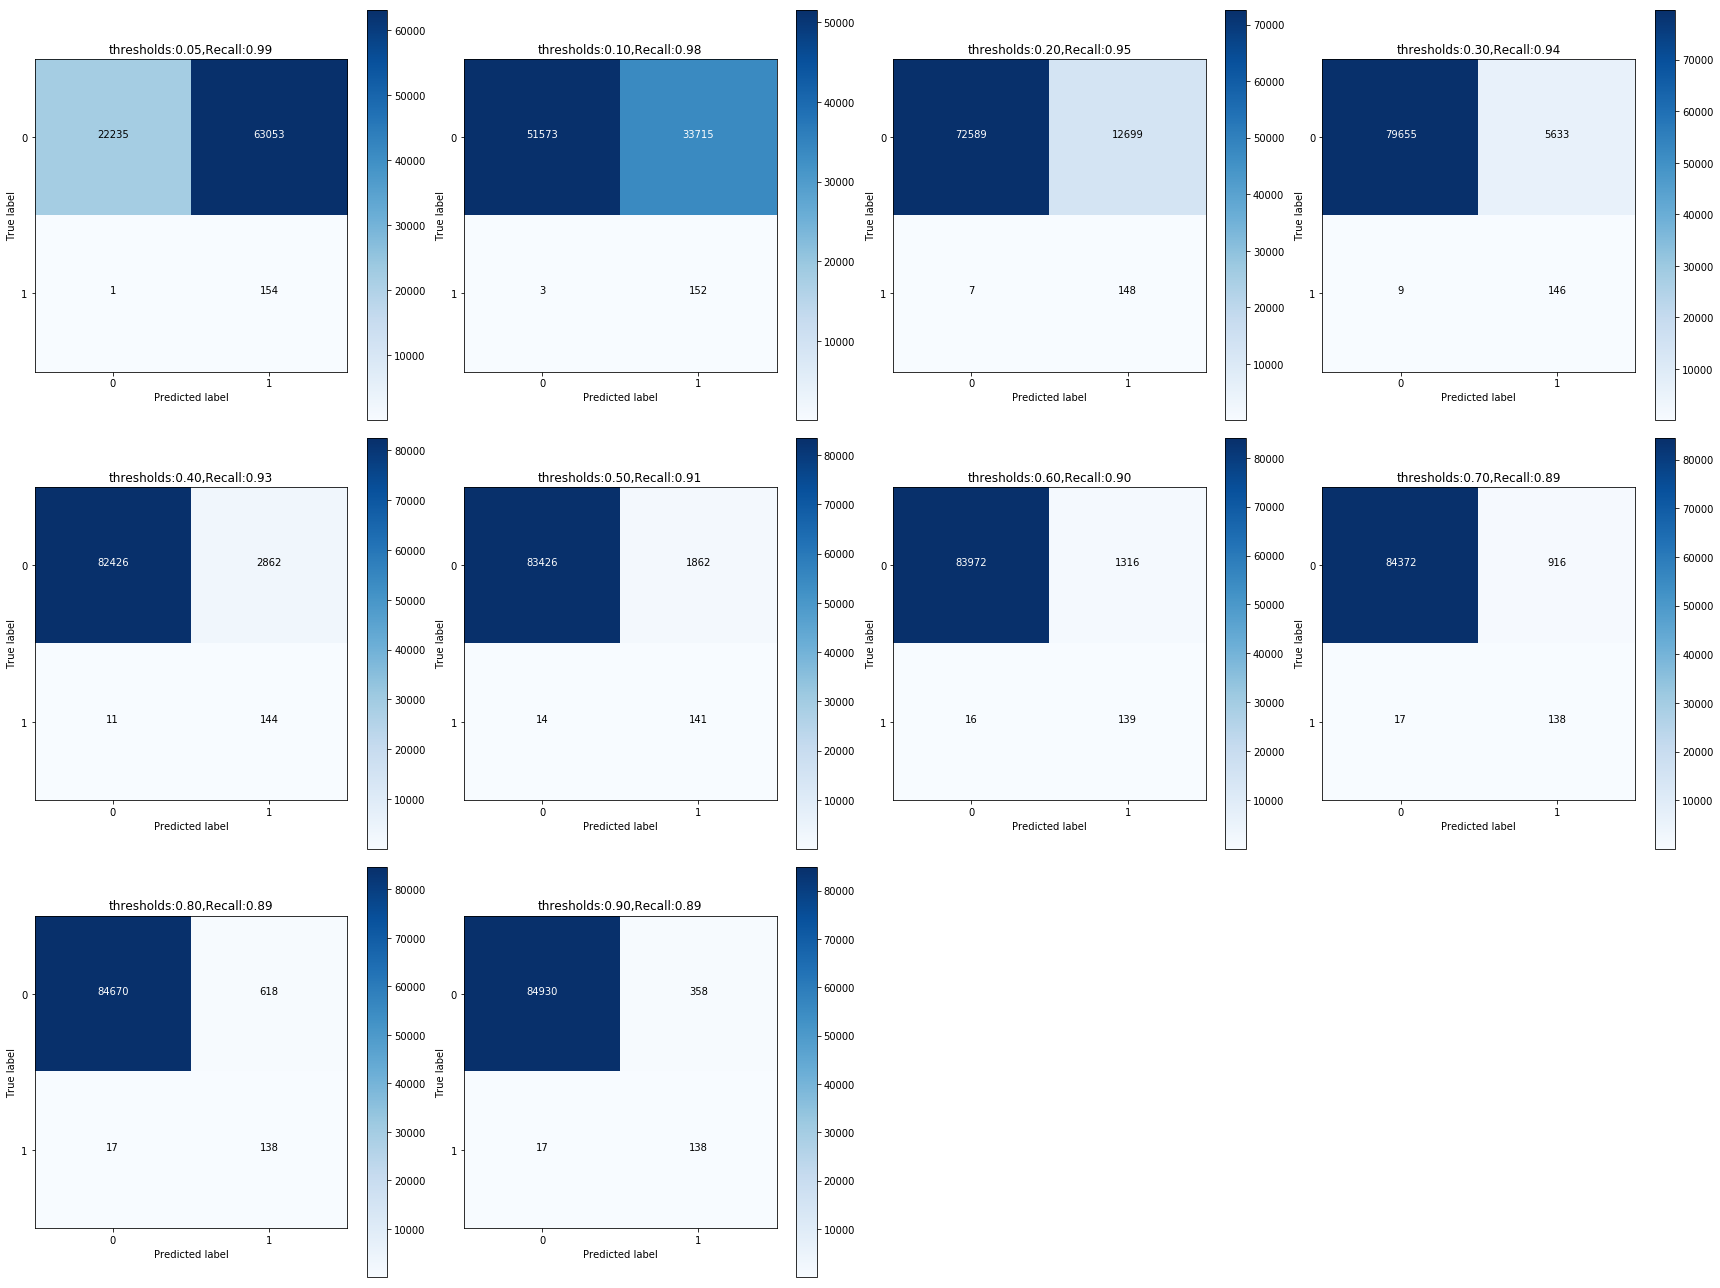

In [83]:
plt.figure(figsize=(24,18))  # 宽度为6，然后有一行4张（6*4），高度为18
for i,cm in enumerate(cms):  # i对应于每个子图
    plt.subplot(3,4,i+1) # 3行4列
    plot_confusion_matrix(cm,[0,1],title='thresholds:%0.2f,Recall:%0.2f'%(thresholds[i],cm[1,1]/(cm[1,0] + cm[1,1])))
# 下图可以看到阈值越小，recall越大，但换来的代价是误判的数量也较大。

# 趋势图

Text(0.5,0,'thresholds')

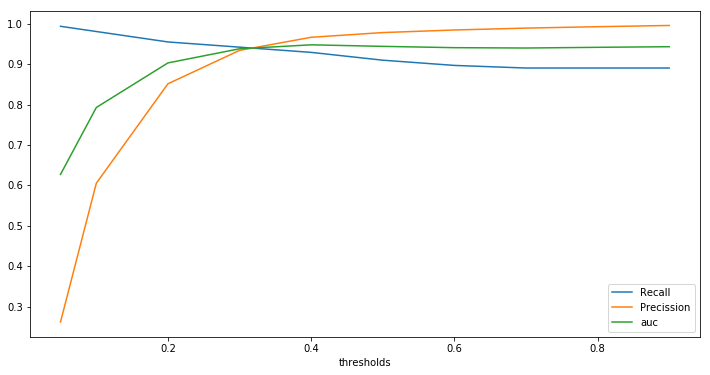

In [84]:
plt.figure(figsize=(12,6))

plt.plot(thresholds,recalls,label = 'Recall')

plt.plot(thresholds,precissions,label = 'Precission')

plt.plot(thresholds,aucs,label = 'auc')

plt.legend()

plt.xlabel('thresholds')

# plt.ylim(0.5,1.2)

由上图所见，随着阈值逐渐变大，Recall rate逐渐变小，Precision rate逐渐变大，AUC值先增后减

# 找出模型最优的阈值

precision和recall是一组矛盾的变量。从上面混淆矩阵和PRC曲线可以看到，阈值越小，recall值越大，模型能找出信用卡被盗刷的数量也就更多，但换来的代价是误判的数量也较大。随着阈值的提高，recall值逐渐降低，precision值也逐渐提高，误判的数量也随之减少。**通过调整模型阈值，控制模型反信用卡欺诈的力度，若想找出更多的信用卡被盗刷就设置较小的阈值，反之，则设置较大的阈值。**
实际业务中，**阈值的选择取决于公司业务边际利润和边际成本的比较**；当模型阈值设置较小的值，确实能找出更多的信用卡被盗刷的持卡人，但随着误判数量增加，不仅加大了贷后团队的工作量，也会降低正常情况误判为信用卡被盗刷客户的消费体验，从而导致客户满意度下降，如果某个模型阈值能让业务的**边际利润和边际成本达到平衡时，则该模型的阈值为最优值**。当然也有例外的情况，发生金融危机，往往伴随着贷款违约或信用卡被盗刷的几率会增大，而金融机构会更愿意设置小阈值，不惜一切代价守住风险的底线。